<a href="https://colab.research.google.com/github/Abhinavl3v3l/drishtypy_test/blob/main/drishtypy_test_play_with_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -i https://test.pypi.org/simple/ drishtypy==0.0.6.28

Looking in indexes: https://test.pypi.org/simple/


In [2]:
import drishtypy.utils.get_cuda as cuda
device = cuda.get_device()

cuda available
Device set to :  cuda:0


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128

In [4]:
import os 
path = os.getcwd()
path

'/content'

In [5]:

import drishtypy.data.returns_dataloader as dl

trainset, testset, train_loader, test_loader = dl.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content']
Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


In [6]:
# import drishtypy.viz.do_plots as plt
# plt.plot_dataset_images(device, classes, train_loader)

In [7]:
import drishtypy.models.resnet as mod
model = mod.ResNet18()

In [8]:
# from drishtypy.learner.learner import model_summary
# model_summary(model, device, input_size=(3, 32, 32))

In [9]:
from tqdm import tqdm
from drishtypy.learner.learner import build_model


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.02E+00


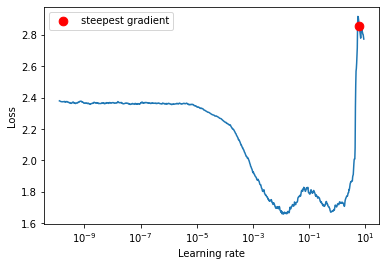

  0%|          | 0/391 [00:00<?, ?it/s]

Using Learning Rate :  0.012080421346773281
EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.215748, Accuracy: 5632/10000 (56.32%)

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.922184, Accuracy: 6721/10000 (67.21%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.799955, Accuracy: 7188/10000 (71.88%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.802638, Accuracy: 7322/10000 (73.22%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.704327, Accuracy: 7634/10000 (76.34%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.613835, Accuracy: 7894/10000 (78.94%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.543253, Accuracy: 8201/10000 (82.01%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.627566, Accuracy: 7887/10000 (78.87%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.603117, Accuracy: 8036/10000 (80.36%)

EPOCH: 9


Loss=0.511144 Batch_id=18 Accuracy=81.46:   5%|▍         | 19/391 [00:03<01:04,  5.77it/s]

In [ ]:
# build and train the model
model_name = "Model CIFAR10"
EPOCHS = 50
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.0001)

In [ ]:
from drishtypy.learner.learner import get_test_accuracy,class_based_accuracy
get_test_accuracy(model, device, test_loader)
class_based_accuracy(model, device, classes, test_loader)

In [ ]:
from drishtypy.viz.do_plots import  plot_model_history
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

In [ ]:
# import gradcam.gradcam_abs as gradcamAbs1
import drishtypy.viz.gradcam.gradcam_abs as gradcamAbs1
from drishtypy.data.data_utils import find_stats
means,stds = find_stats(path)

In [ ]:
config = dict(model_type='resnet', arch=model, layer_name='layer4')
gcam = gradcamAbs1.GradCamAbs(device, config, means, stds)

gradcam_images, pred_results = gcam.applyOnMisclassifiedImages(dataloader=test_loader, num_of_images=25)

gcam.plot_results(gradcam_images, pred_results, classes, save_filename="gradcam_result_details")